In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-05-17 12:12:52.575819: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 12:12:53.420476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2024-05-17 12:12:54.398210: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 12:12:54.542569: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 12:12:54.543090: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Activation
from keras.models import Model,Sequential
from keras.optimizers import Adam , SGD
import tensorflow as tf

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
100%|█████████████████████████████████████▉| 65.0M/65.2M [00:08<00:00, 9.27MB/s]
100%|██████████████████████████████████████| 65.2M/65.2M [00:08<00:00, 7.67MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('emotion-detection-fer.zip', 'r')
zip_ref.extractall('')
zip_ref.close()

In [3]:
batch_size = 128
picture_size = 48

data_train = ImageDataGenerator(rescale=1./255)
data_test = ImageDataGenerator(rescale=1./255)

train_set = data_train.flow_from_directory(
    'train',
    target_size = (picture_size,picture_size),
    color_mode = 'grayscale',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=True
)

test_set = data_test.flow_from_directory(
    'test',
    target_size = (picture_size,picture_size),
    color_mode = 'grayscale',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

# opt = Adam(learning_rate = 0.0001)
# model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

/home/nipun/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-17 12:13:05.687498: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 12:13:05.688190: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testi

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
opt = Adam(learning_rate = 0.0001)
with tf.device('/GPU:0'):
    model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_set, epochs=50,validation_data = test_set)

Epoch 1/50


/home/nipun/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715928195.578968    7188 service.cc:145] XLA service 0x7f00b401a1d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715928195.579011    7188 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-05-17 12:13:15.668872: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-17 12:13:16.059343: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8904


  2/225 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.1523 - loss: 2.4270   

I0000 00:00:1715928211.256615    7188 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 143ms/step - accuracy: 0.2067 - loss: 2.1233 - val_accuracy: 0.1718 - val_loss: 2.0079
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.2710 - loss: 1.8729 - val_accuracy: 0.2104 - val_loss: 1.8972
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.3237 - loss: 1.7662 - val_accuracy: 0.2977 - val_loss: 1.8041
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.3506 - loss: 1.6785 - val_accuracy: 0.3784 - val_loss: 1.6526
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.3779 - loss: 1.6153 - val_accuracy: 0.3696 - val_loss: 1.7484
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.4048 - loss: 1.5542 - val_accuracy: 0.4206 - val_loss: 1.5622
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.4274 - loss: 1.4949 - val_accuracy: 0.4315 - val_loss: 1.5186
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.4481 - loss: 1.4426 - val_accura

In [7]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [10]:
def ef(image):
    img = load_img(image,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [11]:
image = 'test/angry/im0.png'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
model prediction is  angry


original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
model prediction is  fear


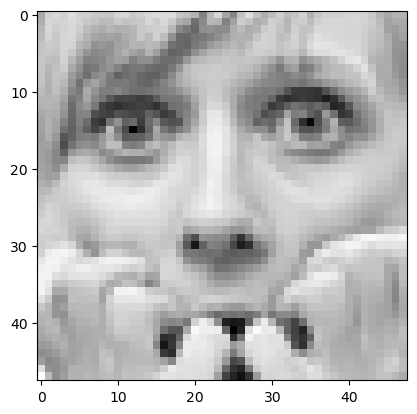

In [12]:
image = 'test/fearful/im2.png'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [13]:
model.save('emotion_detection_model.h5')  # Saves entire model (architecture + weights)

In [14]:
with open('emotion_detection_model.json', 'w') as f:
    f.write(model.to_json())
